# Análise Bidimensional

Na análise de duas variáveis podemos ter as seguintes situações:
- As duas variáveis são qualitativas;
- As duas são quantitativas;
- Um variável é qualitativa e outra quantitativa.

Quando temos dados qualitativos podem aparecer como frequências ou contagem de indivíduos que pertecem a categorias. Já quando temos dados quantitativos, técnicas como gráficos de dispersão ou quantis são apropriados.

Quando temos uma variável quantitativa e outra qualitativa vamos analisar o que acontece com a variável quantitativa quando os dados são categorizados de acordo com os atributos da variável qualitativa.

# Variáveis Qualitativas

In [2]:
import pandas as pd
import numpy as np
data = {
    'Região': ['Capital','Interior','Outra'],
    'Ensino Fundamental': [4, 5, 2],
    'Ensino Médio': [3, 7, 2],
    'Superior': [5, 6, 2]
}

df = pd.DataFrame(data)

colunas_numericas = ['Ensino Fundamental', 'Ensino Médio', 'Superior']
soma_colunas = np.sum(df[colunas_numericas].values, axis=0)
df['Total'] = soma_colunas

df.head()

,Região,Ensino Fundamental,Ensino Médio,Superior,Total
0,Capital,4,3,5,11
1,Interior,5,7,6,12
2,Outra,2,2,2,13


Existem três possibilidades de expressarmos a proporção de cada casela:
- (a)	em relação ao total geral; 
- (b)	em relação ao total de cada linha; 
- (c)ou em relação ao total de cada coluna.

In [3]:
def calcular_porcentagem(row):
    total_regiao = row.sum()
    porcentagem = row / total_regiao * 100
    return porcentagem


colunas_numericas = ['Ensino Fundamental', 'Ensino Médio', 'Superior']

df_porcentagem = df.set_index('Região')[colunas_numericas].apply(calcular_porcentagem, axis=1)

print(df_porcentagem)


          Ensino Fundamental  Ensino Médio   Superior
Região                                               
Capital            33.333333     25.000000  41.666667
Interior           27.777778     38.888889  33.333333
Outra              33.333333     33.333333  33.333333


# Associação entre Variáveis Qualitativas

O objetivo de construir uma distribuição conjunta de duas variáveis qualitativas é descrever a associação entre elas, ou seja, conhecer o grau de dependência.
Por exemplo, caso queira estimar a renda média de uma família moradadora de São Paulo, a informação sobre a classe social permite uma estimativa mais precisa da renda. Dado que existe dependência entre renda e classe social.

In [52]:
alunos = {
    'Curso': ['Economia','Adm'],
    'Masculino': [85, 55],
    'Feminino': [35, 25]
}

In [53]:
#Criando o dataframe
df_alunos = pd.DataFrame(alunos)
df_alunos = df_alunos.set_index('Curso')

In [54]:
#Trazendo o total
def total(row):
    total = row.sum()
    return total
df_alunos['Total'] = df_alunos.apply(total,axis=1)
df_alunos.head()

,Masculino,Feminino,Total
Curso,,,
Economia,85,35,120
Adm,55,25,80


In [55]:
#Queremo verificar se existe associação entre o sexo e a carreira escolhida
def percentual(row):
    total = row.sum()
    percentual = row/total
    return percentual

df_porcentagem = df_alunos.apply(percentual, axis=0)
df_porcentagem.head()

,Masculino,Feminino,Total
Curso,,,
Economia,0.607143,0.583333,0.6
Adm,0.392857,0.416667,0.4


Analisando apenas Economia e adm, temos que independentemente do sexo 60% das pessoas preferem economia e 40% preferem administração. Não tendo dependência entre as variáveis esperaríamos as mesma proporções para cada sexo.

As proporções do sexo masculino (61% e 39%) e do sexo feminino (58% e 42%) são próximas das marginais (60% e 40%). Parecem indicar não haver dependência entre as duas variáveis, para o conjunto de alunos considerado. 

In [56]:
#Analisandos os cursos de Física e Ciências Sociais
alunos2 = {
    'Curso': ['Física','Ciências Sociais'],
    'Masculino': [100,40],
    'Feminino': [20,40]
}

#Criando o dataframe
df_alunos2 = pd.DataFrame(alunos2)
df_alunos2 = df_alunos2.set_index('Curso')

#Trazendo o total
def total(row):
    total = row.sum()
    return total
df_alunos2['Total'] = df_alunos2.apply(total,axis=1)
df_alunos2.head()

,Masculino,Feminino,Total
Curso,,,
Física,100,20,120
Ciências Sociais,40,40,80


In [57]:
df_porcentagem2 = df_alunos2.apply(percentual, axis=0)
df_porcentagem2.head()

,Masculino,Feminino,Total
Curso,,,
Física,0.714286,0.333333,0.6
Ciências Sociais,0.285714,0.666667,0.4


Nos cursos de Física e Ciências temos outro cenário. Temos uma maior concetração de homens nos cursos de física e mulheres no cursos de ciências. Logo, nesse exemplo as variáveis parecem ser associadas.
Quando existe associação entre variáveis, sempre é interessante quantificar essa associação!

#  Medidas de Associação entre Variáveis Qualitativas

O grau de associação entre duas variáveis é feito pela correlação. Essa medida descreve por meio de um único número a associação ou dependência entre duas variáveis. Essas coeficiente vai variar entre -1 e 1.

In [58]:
#Vamos verificar se a criação de um determinado tipo de cooperativa está associada com algum fator regional.
dados_cooperativas = {
    'Estado': ['São Paulo','Paraná','Rio G. do Sul'],
    'Consumidor': [214,51,111],
    'Produtor': [237,102,304],
    'Escola':[78,126,139],
    'Outras':[119,22,48]
}

In [68]:
df_co = pd.DataFrame(dados_cooperativas)
df_co = df_co.set_index('Estado')
df_co.head()

,Consumidor,Produtor,Escola,Outras
Estado,,,,
São Paulo,214,237,78,119
Paraná,51,102,126,22
Rio G. do Sul,111,304,139,48


In [70]:
#Percentual
df_co_porcentagem = df_co.apply(percentual, axis=1)
df_co_porcentagem.head()

,Consumidor,Produtor,Escola,Outras
Estado,,,,
São Paulo,0.330247,0.365741,0.120370,0.183642
Paraná,0.169435,0.338870,0.418605,0.073090
Rio G. do Sul,0.184385,0.504983,0.230897,0.079734


In [78]:
# Calcular o total de cada coluna
total_colunas = df_co.sum()

# Adicionar uma linha com o total de cada coluna
df_co.loc['Total'] = total_colunas

# Calcular o percentual de cada valor em relação ao total geral
df_percentual = df_co / total_colunas.sum()

df_percentual.loc['Total']

Consumidor    0.242424
Produtor      0.414571
Escola        0.221148
Outras        0.121857
Name: Total, dtype: float64

Vemos dependências entre as variáveis. Casi não houvesse associação, eera esparado tivéssemos uma cooperativa de : 
- Consumidor    0.242424
- Produtor      0.414571
- Escola        0.221148
- Outras        0.121857

Então São Paulo seria, 648*24 = 157 consumidores. Tendo valores reais bem discrepantes dos reais.

# Associação entre Variáveis Quantitativas
Podem ser resumi- da em tabelas de dupla entrada e, por meio das distribuições marginais, é possível estudar a associação das variáveis.

Algumas vezes, para evitar um grande número de entradas, agrupamos os dados marginais em intervalos de classes, de modo semelhante ao resumo feito no caso unidimensional. Mas, além desse tipo de aná- lise, as variáveis quantitativas são passíveis de procedimentos analíticos e gráficos mais refinados.

Um dispositivo bastante útil para se verificar a associação entre duas variáveis quantitativas, ou entre dois conjuntos de dados, é o gráfico de dispersão

In [80]:
import pandas as pd
import numpy as np

# Dados fictícios
np.random.seed(1)
renda = np.random.randint(1000, 10000, size=20)  # Renda em reais
metros_quadrados = np.random.randint(50, 200, size=20)  # Metros quadrados

# Criar DataFrame
dados = {
    'Renda': renda,
    'Metros Quadrados': metros_quadrados
}
df = pd.DataFrame(dados)
df.head()

,Renda,Metros Quadrados
0,1235,118
1,6192,146
2,1905,136
3,8813,191
4,3895,187


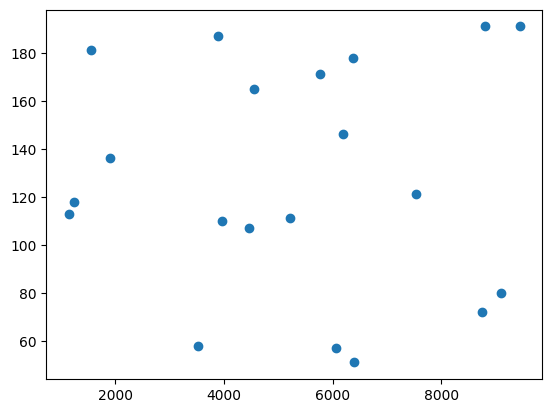

In [85]:
import matplotlib.pyplot as plt

plt.scatter(df['Renda'],df['Metros Quadrados'])
plt.show()

In [87]:
correlacao =df['Renda'].corr(df['Metros Quadrados'])
correlacao

-0.009099791805313718

In [91]:
notas_alunos = pd.read_csv("notas_alunos.csv")
notas_alunos.head()

,Matematica,Ciencias
0,66,10
1,92,22
2,98,77
3,17,18
4,83,100


Queremos descobrir se existe alguma relação entre as disciplinas de matemática e ciencias.

O indice de correlação das notas é: 0.31


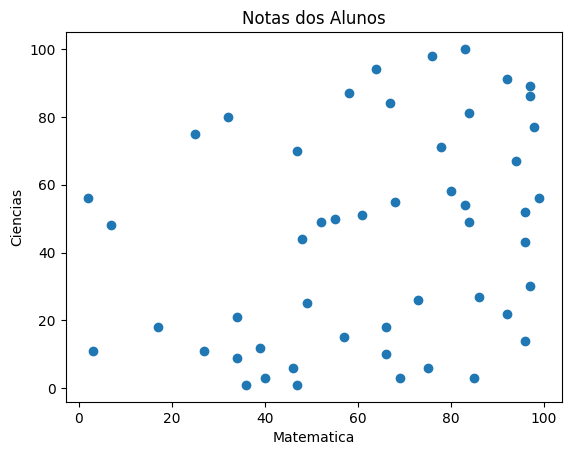

In [98]:
# Separar as variáveis X e Y
x = notas_alunos['Matematica']
y = notas_alunos['Ciencias']

# Plotar o gráfico de dispersão
plt.scatter(x, y)
plt.xlabel('Matematica')
plt.ylabel('Ciencias')
plt.title('Notas dos Alunos')

# Calcular a correlação
correlation = notas_alunos['Matematica'].corr(notas_alunos['Ciencias'])
print(f"O indice de correlação das notas é: {round(correlation,2)}")

 Vimos que o indice de correlação é menor que 0.5, mostrandos que temos uma baixa associação linear. Nesse caso, é necessário fazer a correção de escala e mudança de origem para obter uma medida de associação mais confiável.

In [101]:
# Mudança da origem para o centro dispersão
x_mean = np.mean(x)
y_mean = np.mean(y)

x_centered = [point - x_mean for point in x]
y_centered = [point - y_mean for point in y]

# Correção da escala
x_std = np.std(x_centered)
y_std = np.std(y_centered)
x_scaled = [point / x_std for point in x_centered]
y_scaled = [point / y_std for point in y_centered]

# Cálculo da correlação
correlation = np.mean(np.multiply(x_scaled, y_scaled))

print("Correlação (X, Y):", round(correlation,2))

Correlação (X, Y): 0.31


Mesmo com a correção os valor da correlação se manteve baixo. Mostrando que de fato há uma correlação fraca entre as duas variáveis.